# Homework 2 (Programming Part)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy import random as rnd

%matplotlib inline

## Problem 1

Suppose you are the CEO of a food truck company and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file foodtruck.txt contains the dataset for our linear regression problem. The first column is the population of a city (in 10000s) and the second column is the profit of a food truck in that city (in $10000s). A negative value for profit indicates a loss.

(a) Show a scatter plot of the data (profit vs population)

(b) Train a linear regression model with a non-iterative method. Show the minimum cost (RSS).

(c) Train a linear regression model with stochastic gradient descent (without regularization). Show the minimum cost and check the manual of the class you used to see if you can find the number of epochs before the program is finished.

(d) Make predictions for profits in areas of 35000 and 70000 people.

(e) Make a plot of the regression line along with the training data.

In [188]:
class HW1_linear:
    
    def __init__(self, filename):
        self.ds = np.loadtxt(filename, delimiter = ',')
        self.n, self.col = self.ds.shape[0], self.ds.shape[1]
        self.X = self.ds[:,:(self.col-1)]
        self.y = self.ds[:,self.col-1]
        
    def scatter_plot_1(self): 
        '''(a) Show a scatter plot of the data (profit vs population)'''
        plt.plot(self.ds[:,0], self.ds[:,1],'.', color='b', label = 'training data')
        plt.xlabel('Population, 10000s')
        plt.ylabel('Profit, $10000s')
        plt.legend()
        
    def train_linear_noniterative(self): 
        '''(b) Train a linear regression model with a non-iterative method. Show the minimum cost (RSS).'''
        self.lin_reg = sklearn.linear_model.LinearRegression()
        self.lin_reg.fit(self.X, self.y)
        rss = self.n * mean_squared_error(self.y, self.lin_reg.predict(self.X))
        print(f'RSS of the linear model is {rss:.2f}')
        return(rss)

    def train_SGD(self, verb = 0):
        '''(c) Train a linear regression model with stochastic gradient descent (without regularization). 
        Show the minimum cost and check the manual of the class you used to see 
        if you can find the number of epochs before the program is finished.'''
        
        self.sgd_reg = SGDRegressor(verbose=verb, penalty=None)
        self.sgd_reg.fit(self.X, self.y)
        rss = self.n * mean_squared_error(self.y, self.sgd_reg.predict(self.X))
        print(f'RSS of the linear model by SGD is {rss:.2f}')
        print('Iterations before reaching stopping criterion: ', self.sgd_reg.n_iter_)
        return(rss)
    
    def make_prediction(self, areas): # people as list, NOT thousand
        '''(d) Make predictions for profits in areas of 35000 and 70000 people.'''
        a = np.c_[np.array(areas)/10000]
        lin_predicted = self.lin_reg.predict(a)
        SGD_lin_predicted = self.sgd_reg.predict(a)
        print(f'for areas of {areas} people')
        print(f'non-iterative linear regression predicts ${lin_predicted[0]*10000:.0f}, ${lin_predicted[1]*10000:.0f}')
        print(f'SGD linear regression predicts ${SGD_lin_predicted[0]*10000:.0f}, ${SGD_lin_predicted[0]*10000:.0f}')

    def plot_regressions(self):
        '''(e) Make a plot of the regression line along with the training data.'''
        self.train_linear_noniterative()
        self.train_SGD()
        plt.plot(self.X, self.y,'.', color='b', label = 'training data')
        plt.plot(self.X, self.lin_reg.predict(self.X), color='r', label = 'non-iterarive regression')
        plt.plot(self.X, self.sgd_reg.predict(self.X), color='g', label = 'SGD regression')
        plt.xlabel('Population, 10000s')
        plt.ylabel('Profit, $10000')
        plt.legend()

if __name__ == '__main__':
    %cd /Users/AM/Documents/_CU Masters/2021 spr Python ML_5027/HW/hw_data
    f = HW1_linear('foodtruck.txt')
    

/Users/AM/Documents/_CU Masters/2021 spr Python ML_5027/HW/hw_data


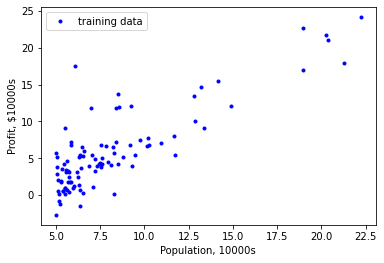

In [190]:
f.scatter_plot_1()

In [191]:
temp = f.train_linear_noniterative()

RSS of the linear model is 868.53


In [192]:
temp = f.train_SGD(verb=0)


RSS of the linear model by SGD is 920.88
Iterations before reaching stopping criterion:  26


**With verb=1 we can find the number of epochs before the program is finished.**

(we can also see it by self.sgd_reg.n_iter_)



In [193]:
f.make_prediction([35000, 70000])

for areas of [35000, 70000] people
non-iterative linear regression predicts $2798, $44555
SGD linear regression predicts $14329, $14329


RSS of the linear model is 868.53
RSS of the linear model by SGD is 926.82
Iterations before reaching stopping criterion:  21


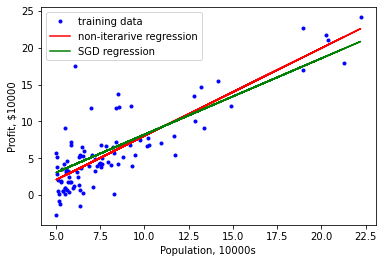

In [194]:
f.plot_regressions()

## Problem 2

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. 

The file houseprice.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house.

(a) Train a linear regression model with SGD and print out the minimum cost (RSS).\\

(b) Train a linear regression model with a non-iterative method and print out the minimum cost (RSS).\\

(c) Do the minimum costs agree?\\

(d) Scale you feature matrix using sklearn.preprocessing.StandardScaler. See the manual about what it is and how to use it. Train a linear regression model with SGD using the scaled features. Print out the minimum cost and what do you find?

In [7]:
p = HW1_linear('houseprice.txt')

# (a) Train a linear regression model with SGD and print out the minimum cost (RSS).\\
p.train_SGD() 

#(b) Train a linear regression model with a non-iterative method and print out the minimum cost (RSS).\\
temp = p.train_linear_noniterative() 

RSS of the linear model by SGD is 1497950623642652731004917171355648.00
RSS of the linear model is 192068324756.67


(c) Do the minimum costs agree?\

**As we see above, the cost difference is huge**

In [8]:
# (d) Scale you feature matrix using sklearn.preprocessing.StandardScaler. 
#See the manual about what it is and how to use it. 
#Train a linear regression model with SGD using the scaled features. 
#Print out the minimum cost and what do you find?

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(p.X)
p.X = scaler.transform(p.X) #scale X inside the object
temp1 = p.train_SGD() 
temp2 = p.train_linear_noniterative() 
print(f'\nthe costs difference is around {100*abs(temp1 - temp2)/temp1:.4f}%')

RSS of the linear model by SGD is 192070629099.94
RSS of the linear model is 192068324756.67

the costs difference is around 0.0012%


**We can see that the costs are almost equal after the scaling**

## Problem 3

We want to implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model. The data are stored in QA.txt. The first two columns are the results for the two tests. The third column is the acceptance (1) or rejection (0) of the microchips.

(a) Visualize the data; different classes should have different colors and markers.

(b) Use polynomial features of degree 6 for the logistic regression. Use L2 regulariztion where $\alpha=1$. Use the following function plot_decision_boundary to plot the decision boundary.

(c) Repeat (b) using $\alpha=0$ and $\alpha=100$

(d) What do you find for the three cases?

/Users/AM/Documents/_CU Masters/2021 spr Python ML_5027/HW/hw_data


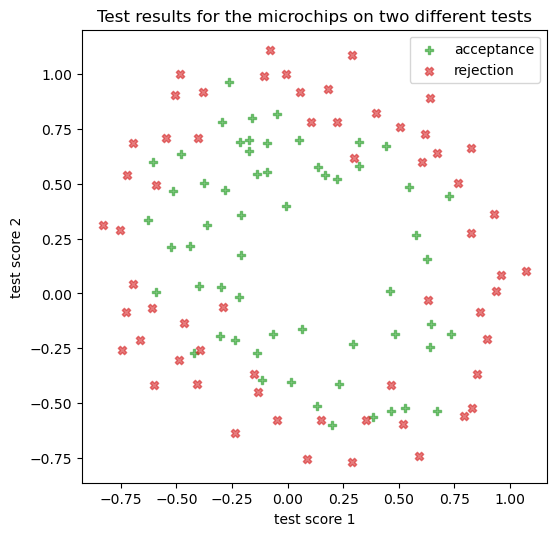

In [195]:
class HW1_poly:
    
    def __init__(self, filename, poly_degree = 6):
        self.ds = np.loadtxt(filename, delimiter = ',')
        self.n, self.col = self.ds.shape[0], self.ds.shape[1]
        self.X = self.ds[:,:(self.col-1)]
        self.X_poly = self.X
        self.poly_degree = poly_degree
        self.y = self.ds[:,self.col-1]
        self.acceptance = self.ds[self.y == 1]
        self.rejection = self.ds[self.y == 0]
            
    def scatter_plot(self): 
        '''(a) Visualize the data; different classes should have different colors and markers.'''
        plt.figure(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')
        plt.scatter(self.acceptance[:,0], self.acceptance[:,1],\
                    c = 'tab:green', marker = 'P', label = 'acceptance', alpha=0.6)
        plt.scatter(self.rejection[:,0], self.rejection[:,1],\
                    c = 'tab:red', marker = 'X', label = 'rejection', alpha=0.6)
        plt.xlabel('test score 1')
        plt.ylabel('test score 2')
        plt.legend()
        plt.title('Test results for the microchips on two different tests')

    def log_poly(self, a=1, penalty = "l2"):
        '''(b) Use polynomial features of degree 6 for the logistic regression. 
        Use L2 regulariztion where $\alpha=1$. 
        Use the following function plot_decision_boundary to plot the decision boundary.'''
        poly = PolynomialFeatures(self.poly_degree)
        self.X_poly = poly.fit_transform(self.X)
        
        self.log_reg_poly = LogisticRegression(penalty= penalty, C=(1/a), max_iter = round(100+1/a))
        self.log_reg_poly.fit(self.X_poly, self.y)
        return(self.log_reg_poly)
    
if __name__ == '__main__':
    %cd /Users/AM/Documents/_CU Masters/2021 spr Python ML_5027/HW/hw_data
    m = HW1_poly('QA.txt', poly_degree=6)
    m.scatter_plot()

    

In [196]:
def plot_decision_boundary(model, accepted, rejected, poly_degree = 6):
    """
    Plot the decision boundary along with the data for problem 3
    input:
    model: the logistic regression model
    accepted: dataframe of two columns that contains the two test scores for accepted microchips
    rejected: dataframe of two columns that contains the two test scores for rejected microchips
    """
    x_min, x_max = -1, 1.5
    y_min, y_max = -0.8, 1.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    poly = PolynomialFeatures(poly_degree)
    Z = model.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.scatter(accepted[:, 0], accepted[:, 1], marker='x')
    plt.scatter(rejected[:, 0], rejected[:, 1], marker='s')
    plt.legend(['Accepted', 'Rejected'])
    plt.xlabel('Test score 1')
    plt.ylabel('Test score 2');

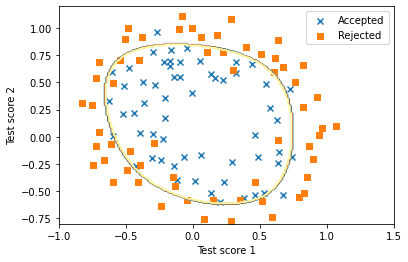

In [197]:
plot_decision_boundary(m.log_poly(a=1), m.acceptance, m.rejection, poly_degree=m.poly_degree)

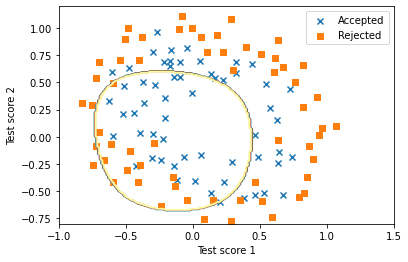

In [198]:
plot_decision_boundary(m.log_poly(a=100), m.acceptance, m.rejection, poly_degree = m.poly_degree)

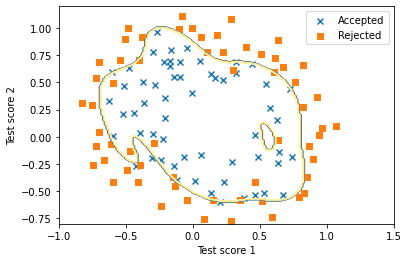

In [199]:
plot_decision_boundary(m.log_poly(a=0.0000001), m.acceptance, m.rejection, poly_degree = m.poly_degree)

/Users/AM/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


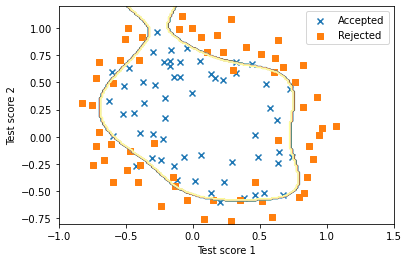

In [201]:
plot_decision_boundary(m.log_poly(penalty = 'none'), m.acceptance, m.rejection, poly_degree = m.poly_degree)

**(d) What do you find for the three cases?**

As Scikit-learn documentation does not explicitly show the way to control $\alpha$ (using C instead), we had to calculate C as the reciprocal of $\alpha$.

$\alpha = 100$ gives underfitting

$\alpha = 1$ looks normal

$\alpha = 10^{-7} $ overfits (was done with a comparable increase of max_iter)

$\alpha = 0$   C is not defined because of division by zero, so just set penalty = 'none' and got the overfit



